In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

Load the data

In [ ]:
train = pd.read_csv('/content/train_LZdllcl (2).csv')
test = pd.read_csv('/content/test_2umaH9m (2).csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [ ]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [ ]:
train.skew()

TypeError: could not convert string to float: 'Sales & Marketing'

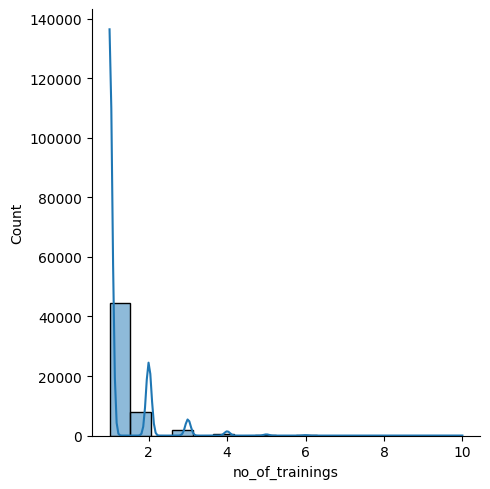

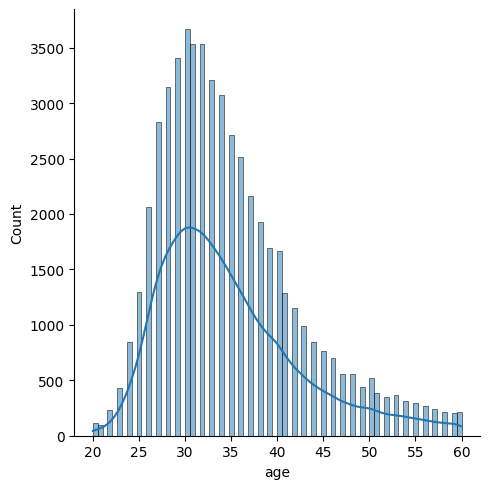

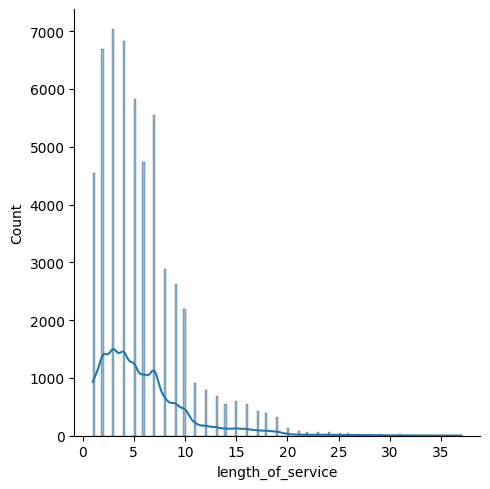

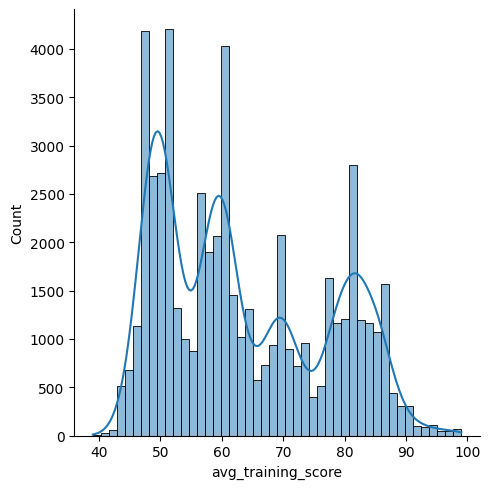

In [ ]:
for i in train.columns:
  if i in ['no_of_trainings' , 'age' , 'previous_year_rating?', 'length_of_service', 'avg_training_score']:
    sns.displot(train[i] , kde = True)
  else:
    continue

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [ ]:
columns_to_plot = ['department' , 'region' , 'education', 'gender', 'recruitment_channel', 'KPIs_met >80%', 'awards_won?', 'is_promoted']

In [ ]:
train['is_promoted'].value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

<Axes: xlabel='department'>

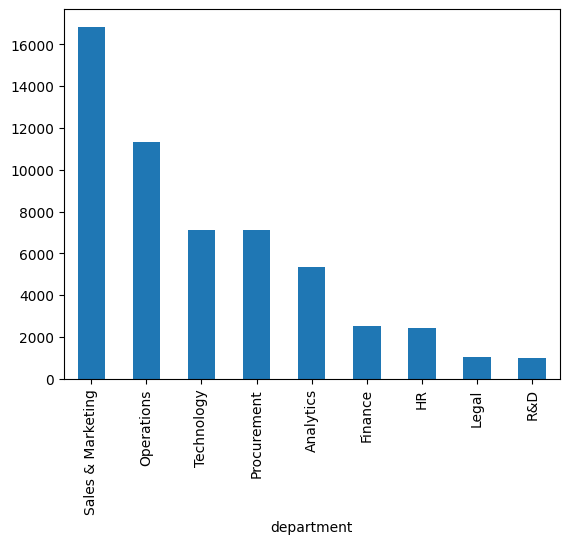

In [ ]:
train['department'].value_counts().plot(kind='bar')

Data Preparation

In [ ]:
train['education'].mode()[0]

"Bachelor's"

<Axes: xlabel='previous_year_rating'>

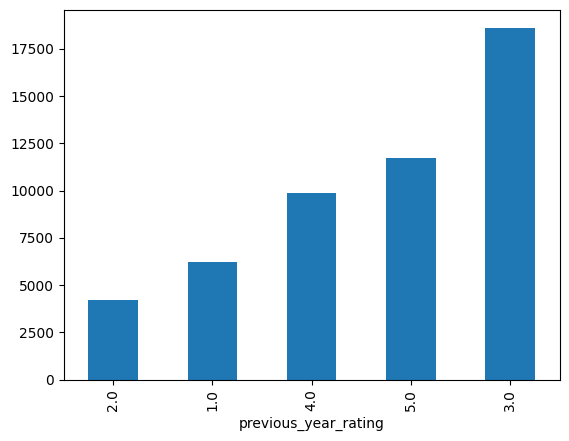

In [ ]:
train['previous_year_rating'].value_counts().sort_values().plot(kind='bar')

In [ ]:
train['education'] = np.where(train['education'].isna(), train['education'].mode(dropna=True)[0], train['education'])
train['previous_year_rating'] = np.where(train['previous_year_rating'].isna(), train['previous_year_rating'].median(skipna= True), train['previous_year_rating'])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [ ]:
train['previous_year_rating'] = train['previous_year_rating'].astype('int')

In [ ]:
train_enc = pd.get_dummies(train)

In [ ]:
train_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   employee_id                   54808 non-null  int64
 1   no_of_trainings               54808 non-null  int64
 2   age                           54808 non-null  int64
 3   previous_year_rating          54808 non-null  int64
 4   length_of_service             54808 non-null  int64
 5   KPIs_met >80%                 54808 non-null  int64
 6   awards_won?                   54808 non-null  int64
 7   avg_training_score            54808 non-null  int64
 8   is_promoted                   54808 non-null  int64
 9   department_Analytics          54808 non-null  bool 
 10  department_Finance            54808 non-null  bool 
 11  department_HR                 54808 non-null  bool 
 12  department_Legal              54808 non-null  bool 
 13  department_Operations         5

In [ ]:
train_enc.drop(['employee_id'], axis = 1, inplace = True)

Divide Data into X & Y

In [ ]:
y = train['is_promoted']

In [ ]:
x = train_enc

In [ ]:
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [ ]:
print(x.shape)
print(y.shape)

(100280, 59)
(100280,)


<Axes: xlabel='is_promoted'>

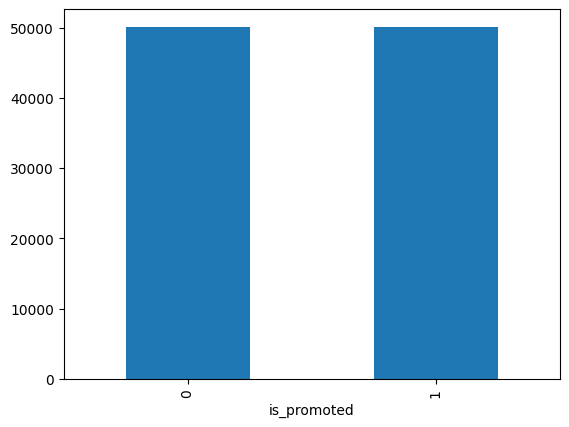

In [ ]:
y.value_counts().plot(kind='bar')

Naive Bayes

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [ ]:
x_train.drop(['is_promoted'], axis = 1, inplace = True)
x_test.drop(['is_promoted'], axis = 1, inplace = True)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(80224, 58)
(20056, 58)
(80224,)
(20056,)


In [ ]:
nb = GaussianNB()
nb.fit(x_train, y_train)
y_hat_train_nb = nb.predict(x_train)
y_hat_test_nb = nb.predict(x_test)

In [ ]:
def model_eval(actual, predicted):
  conf_matrix = confusion_matrix(actual,predicted)
  acc_score = accuracy_score(actual, predicted)
  clas_rep = classification_report(actual, predicted)
  print('The Accuracy of the model is: ', round(acc_score,2))
  print(conf_matrix)
  print(clas_rep)

In [ ]:
model_eval(y_train, y_hat_train_nb)

The Accuracy of the model is:  0.75
[[22998 16947]
 [ 3242 37037]]
              precision    recall  f1-score   support

           0       0.88      0.58      0.69     39945
           1       0.69      0.92      0.79     40279

    accuracy                           0.75     80224
   macro avg       0.78      0.75      0.74     80224
weighted avg       0.78      0.75      0.74     80224



In [ ]:
model_eval(y_test, y_hat_test_nb)

The Accuracy of the model is:  0.74
[[5856 4339]
 [ 807 9054]]
              precision    recall  f1-score   support

           0       0.88      0.57      0.69     10195
           1       0.68      0.92      0.78      9861

    accuracy                           0.74     20056
   macro avg       0.78      0.75      0.74     20056
weighted avg       0.78      0.74      0.74     20056



Application of the model on the test data

In [ ]:
test['education'] = np.where(test['education'].isna(), test['education'].mode(dropna=True)[0], test['education'])
test['previous_year_rating'] = np.where(test['previous_year_rating'].isna(), test['previous_year_rating'].median(skipna= True), test['previous_year_rating'])

In [ ]:
test['previous_year_rating'] = test['previous_year_rating'].astype('int')

In [ ]:
test_enc = pd.get_dummies(test)

In [ ]:
test_enc.drop(['employee_id'], axis = 1, inplace = True)

In [ ]:
test['is_promoted'] = nb.predict(test_enc)

In [ ]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,3,1,1,0,77,0
1,74430,HR,region_4,Bachelor's,f,other,1,31,3,5,0,0,51,0
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1,4,0,0,47,0
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2,9,0,0,65,1
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4,7,0,0,61,0


In [ ]:
submission_file = pd.read_csv('/content/sample_submission_M0L0uXE (2).csv')

In [ ]:
submission_file.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [ ]:
submission_file['is_promoted'] = test['is_promoted']

In [ ]:
submission_file['is_promoted'].value_counts()

is_promoted
0    13406
1    10084
Name: count, dtype: int64

In [ ]:
submission_file.to_csv('submission.csv', index= False)